In [1]:
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.isnull().sum().sum()

866

In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df['Fare'].fillna(0, inplace=True)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,N,C


In [6]:
titanic_df.isnull().sum().sum()

0

In [7]:
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [8]:
corr_df = titanic_df.corr(numeric_only=True)
corr_df['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [9]:
maxi = [0, 0, 0]
corrl = list(corr_df['Survived'].values)
corrl.remove(1)
for i in range(len(corrl)):
    corrl[i] = abs(corrl[i])
for i in range(len(maxi)):
    maxi[i] = max(corrl)
    corrl.remove(maxi[i])
maxi

[0.33848103596101514, 0.2573065223849626, 0.08162940708348335]

In [10]:
corrl = list(corr_df['Survived'].values)

In [11]:
for i in list(corr_df['Survived'].values):
    if abs(i) in maxi:
        print(maxi[maxi.index(abs(i))])
        print(corr_df.iloc[corrl.index(i), :].name)

0.33848103596101514
Pclass
0.08162940708348335
Parch
0.2573065223849626
Fare


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [13]:
train_df = titanic_df
titanic_df_test = pd.read_csv('test.csv')

In [14]:
titanic_df_test['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df_test['Cabin'].fillna('N', inplace=True)
titanic_df_test['Embarked'].fillna('N', inplace=True)
titanic_df_test['Fare'].fillna(0, inplace=True)

In [15]:
le = LabelEncoder()
train_df['Sex'] = le.fit(train_df['Sex']).transform(train_df['Sex'])
titanic_df_test['Sex'] = le.fit(titanic_df_test['Sex']).transform(titanic_df_test['Sex'])
le.transform(["male", 'female'])

array([1, 0])

In [16]:
le = LabelEncoder()
train_df['Cabin'] = le.fit(train_df['Cabin']).transform(train_df['Cabin'])

titanic_df_test['Cabin'] = le.fit(titanic_df_test['Cabin']).transform(titanic_df_test['Cabin'])

train_df['Embarked'] = le.fit(train_df['Embarked']).transform(train_df['Embarked'])

titanic_df_test['Embarked'] = le.fit(titanic_df_test['Embarked']).transform(titanic_df_test['Embarked'])
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,146,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,146,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,30,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,146,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,60,0


In [17]:
y_train = train_df["Survived"].values

train_df = train_df.drop(labels='Survived', axis=1)
train_df = train_df.drop(labels='Name', axis=1)
train_df = train_df.drop(labels='Ticket', axis=1)

titanic_df_test = titanic_df_test.drop(labels='Ticket', axis=1)
titanic_df_test = titanic_df_test.drop(labels='Name', axis=1)

X_train = train_df.values
train_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.000000,1,0,7.2500,146,3
1,2,1,0,38.000000,1,0,71.2833,81,0
2,3,3,0,26.000000,0,0,7.9250,146,3
3,4,1,0,35.000000,1,0,53.1000,55,3
4,5,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,146,3
887,888,1,0,19.000000,0,0,30.0000,30,3
888,889,3,0,29.699118,1,2,23.4500,146,3
889,890,1,1,26.000000,0,0,30.0000,60,0


In [18]:
X_test = titanic_df_test.values
titanic_df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.500000,0,0,7.8292,76,1
1,893,3,0,47.000000,1,0,7.0000,76,2
2,894,2,1,62.000000,0,0,9.6875,76,1
3,895,3,1,27.000000,0,0,8.6625,76,2
4,896,3,0,22.000000,1,1,12.2875,76,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,29.699118,0,0,8.0500,76,2
414,1306,1,0,39.000000,0,0,108.9000,22,0
415,1307,3,1,38.500000,0,0,7.2500,76,2
416,1308,3,1,29.699118,0,0,8.0500,76,2


In [19]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred_lg = logReg.predict(X_test)
acc_lg = round( logReg.score(X_train, y_train) * 100, 2)
print ("accuracy: " + str(acc_lg) + '%')

accuracy: 80.58%


c:\Users\ganya\PycharmProjects\Anime-DataSet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_train, y_train) * 100, 2)
print ("accuracy: " + str(acc_dtc) + '%')

accuracy: 81.93%


In [21]:
feature_cols = list(train_df.columns)

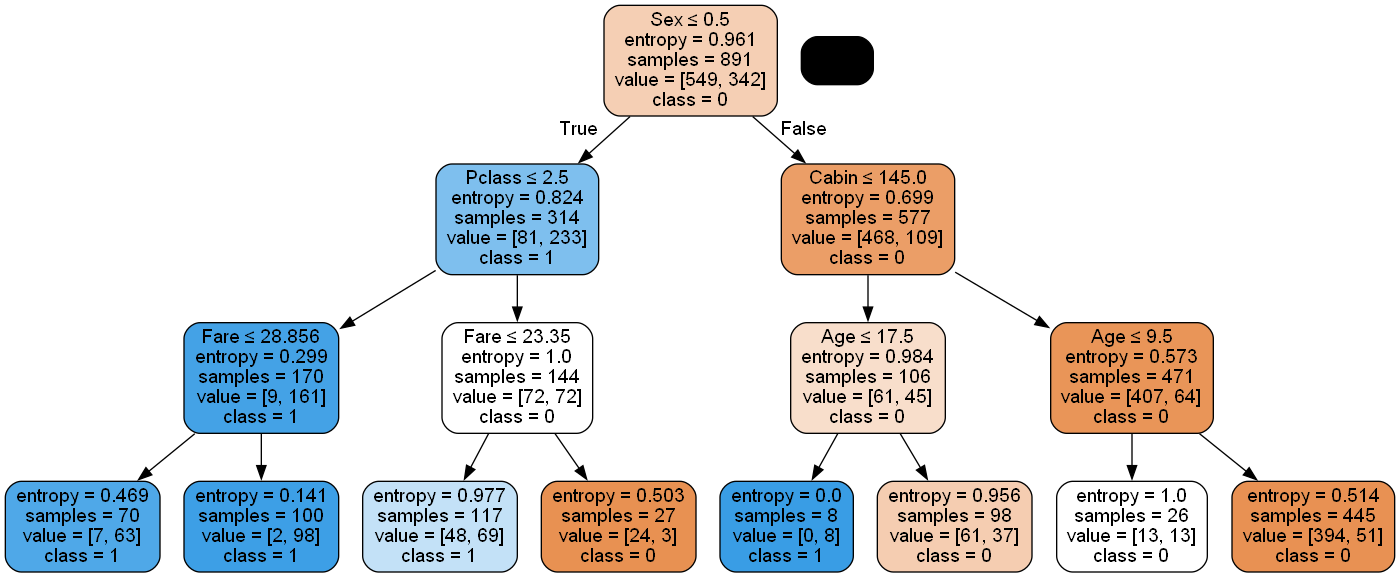

In [22]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisiontree.png')
Image(graph.create_png())

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("learning rate : ", learning_rate)
    print(f"accuracy score (training) : {round(gb_clf.score(X_train, y_train), 2)}")
    print(f"accuracy score (test) : {round(gb_clf.score(X_test, y_pred_lg), 2)}")

learning rate :  0.05
accuracy score (training) : 0.8
accuracy score (test) : 0.88
learning rate :  0.075
accuracy score (training) : 0.81
accuracy score (test) : 0.89
learning rate :  0.1
accuracy score (training) : 0.81
accuracy score (test) : 0.89
learning rate :  0.25
accuracy score (training) : 0.83
accuracy score (test) : 0.93
learning rate :  0.5
accuracy score (training) : 0.84
accuracy score (test) : 0.87
learning rate :  0.75
accuracy score (training) : 0.86
accuracy score (test) : 0.85
learning rate :  1
accuracy score (training) : 0.86
accuracy score (test) : 0.74


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix :")
print(confusion_matrix(y_pred_lg, predictions))
acc_gbc = round(gb_clf.score(X_train, y_train)*100, 2)
print(f"Accuracy score (training) : {acc_gbc}")

Confusion Matrix :
[[235  26]
 [  4 153]]
Accuracy score (training) : 86.2


In [26]:
models = pd.DataFrame({
    'Model': ['logReg', 'DecTree', 'GradBoosting'],
    
    'Score': [acc_lg, acc_dtc, acc_gbc]
    })

models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
2,GradBoosting,86.20
1,DecTree,81.93
0,logReg,80.58


C:\Users\ganya\AppData\Local\Temp\ipykernel_7196\2203912919.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='Score', ci=None, data=models)


<AxesSubplot: xlabel='Model', ylabel='Score'>

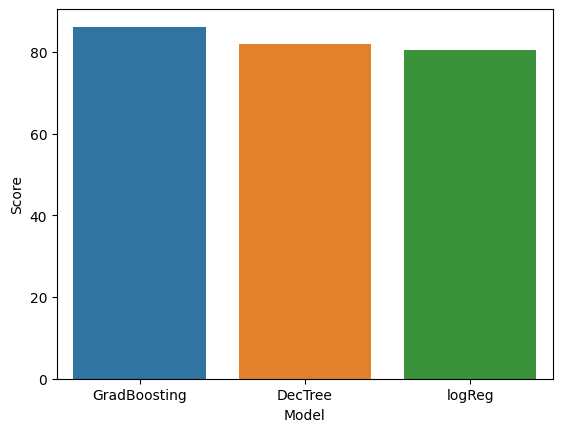

In [27]:
sns.barplot(x='Model', y='Score', ci=None, data=models)